In [1]:
import startJVM
import jpype
import jpype.imports
import numpy as np
import matplotlib.pyplot as plt

/Users/hangal1/Documents/research/rda/radsim/proj-radsim/src


In [2]:
from gov.llnl.rtk.physics import Nuclides
from gov.llnl.rtk.physics import SourceImpl
from gov.llnl.rtk.physics import Quantity
from gov.llnl.rtk.physics import EmissionCalculator
from gov.bnl.nndc.ensdf.decay import BNLDecayLibrary
from gov.sandia.gadras.decay import DecayLibrary
from gov.nist.physics.xray import NISTXrayLibrary
from gov.llnl.rtk.physics import DecayCalculator

In [3]:
from java.nio.file import Paths
from java.util import ArrayList

In [4]:
bnllib = BNLDecayLibrary()
bnllib.setXrayLibrary(NISTXrayLibrary.getInstance())
bnllib.loadFile(Paths.get("BNL2023.txt"))

In [5]:
# This is to test the calculate function with a chosen decay library
activity = Quantity.of(1,"Ci")
nuclide = SourceImpl.fromActivity(Nuclides.get("Cs137"), activity)

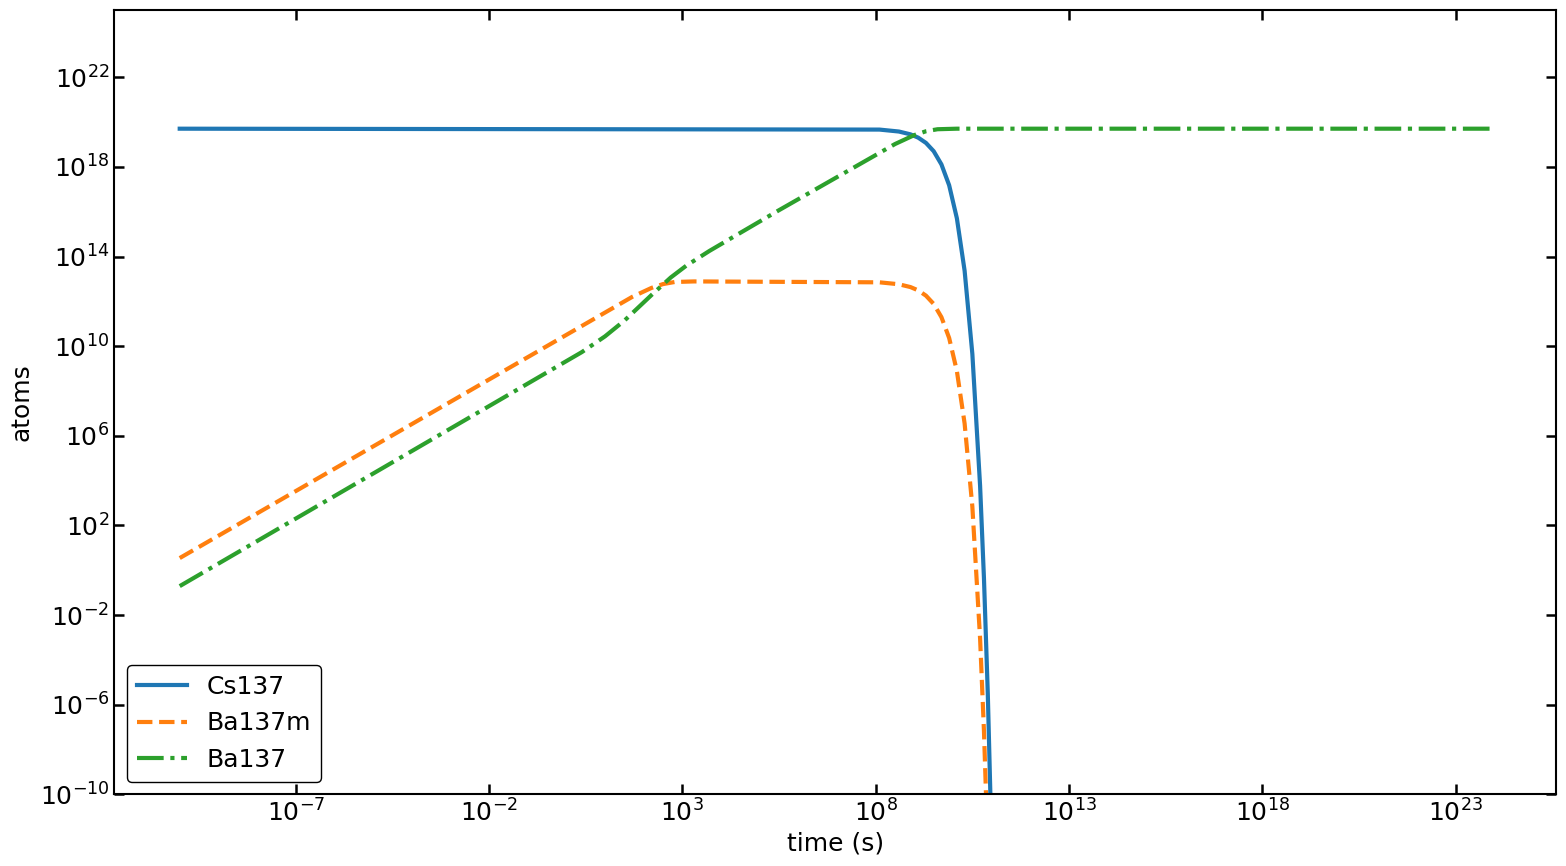

In [6]:
#add aging of Cs137 source
dc = DecayCalculator()
#dc.setDecayLibrary(bnllib)
sandialib = DecayLibrary.getInstance()
dc.setDecayLibrary(sandialib)

sourceList = ArrayList()
sourceList.add(nuclide)
try:
    aged_sourceList = dc.age(sourceList,100)
except jpype.JException as ex:
    print(ex.stacktrace())
    raise ex

plt.clf()
t=10**np.arange(-10,24,0.1)
out = []
for i in t:
    result = dc.age(sourceList, i)
    out.append([j.getAtoms() for j in result])

ls = ['-','--','-.']

out=np.array(out)
for i in range(len(aged_sourceList)):
    plt.plot(t, np.array(out[:,i]), linestyle = ls[i], linewidth = 3, label=str(aged_sourceList[i].getNuclide()))
plt.legend()

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-10,1e25)
plt.xlabel('time (s)')
plt.ylabel('atoms')
plt.show()

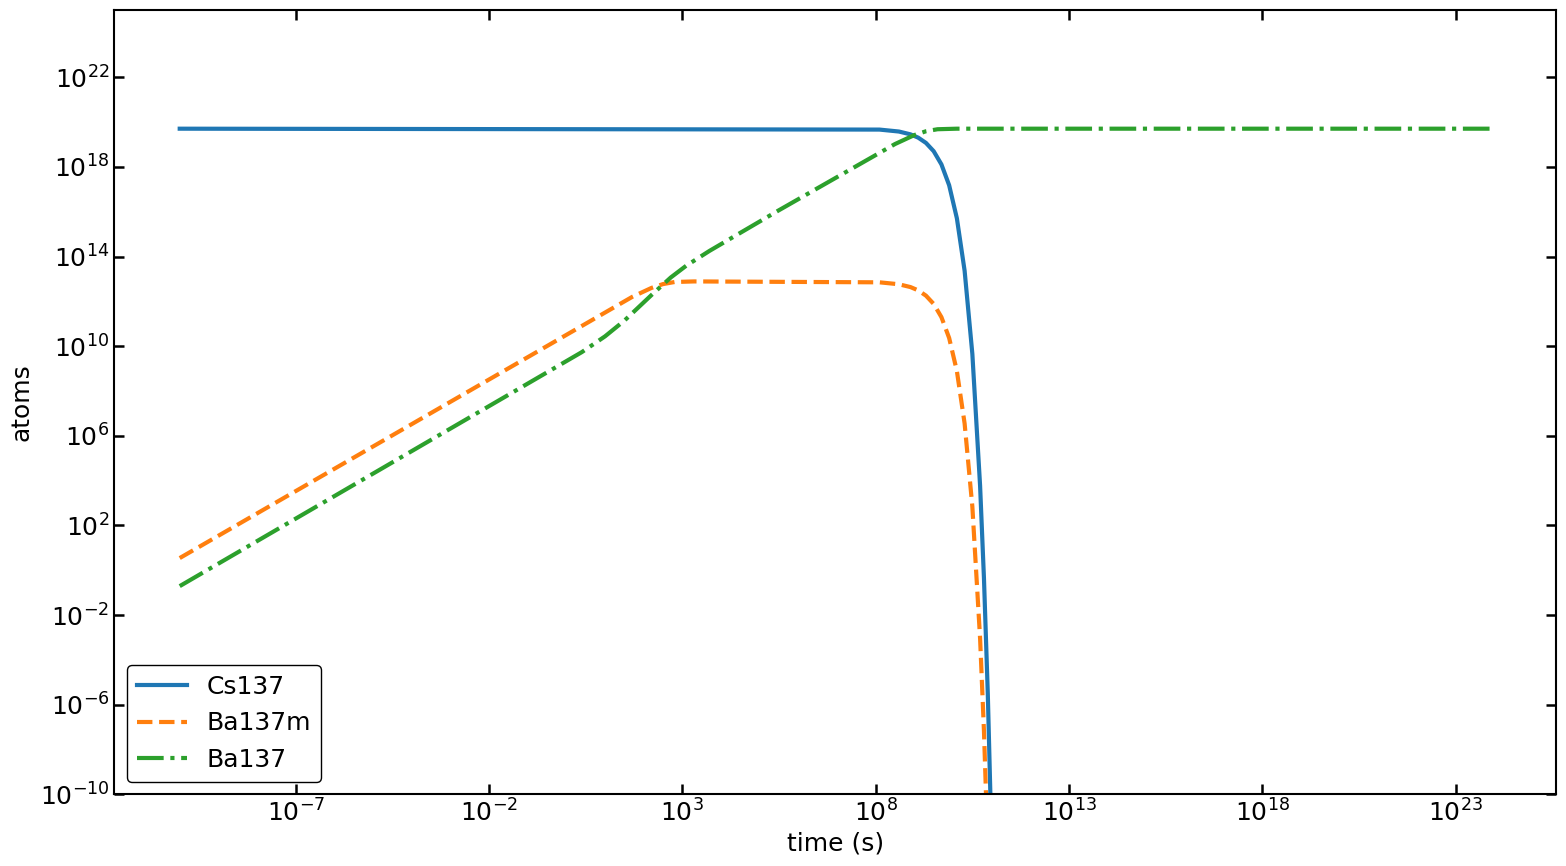

In [7]:
sandialib = DecayLibrary.getInstance()
#add aging of Cs137 source
dc = DecayCalculator()
dc.setDecayLibrary(sandialib)

sourceList = ArrayList()
sourceList.add(nuclide)
aged_sourceList = dc.age(sourceList,100)

plt.clf()
t=10**np.arange(-10,24,0.1)
out = []
for i in t:
    result = dc.age(sourceList, i)
    out.append([j.getAtoms() for j in result])

ls = ['-','--','-.']

out=np.array(out)
for i in range(len(aged_sourceList)):
    plt.plot(t, np.array(out[:,i]), linestyle = ls[i], linewidth = 3, label=str(aged_sourceList[i].getNuclide()))
plt.legend()

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-10,1e25)
plt.xlabel('time (s)')
plt.ylabel('atoms')
plt.show()